In [64]:
import pandas as pd
import numpy as np
import scipy as sp
import scipy.signal as signal
from scipy import interpolate
import matplotlib.pyplot as plt

%matplotlib inline








Ex. 1

Read data file(s) given in data.zip. There are several simultaneously measured and time synced signals (ecg and two ppg sensors both containing three channels with different wavelengths.

In [67]:
clean = pd.read_csv('ecg_ppg_clean.csv') 
clean.head()

,timestamps_ecg,ecg,timestamps_ppg_1_green,ppg_1_green,timestamps_ppg_1_red,ppg_1_red,timestamps_ppg_1_ir,ppg_1_ir,timestamps_ppg_2_green,ppg_2_green,timestamps_ppg_2_red,ppg_2_red,timestamps_ppg_2_ir,ppg_2_ir
0,725290.0,-1949.000000,725314.0,31289.000000,725314.0,2.274565e+06,725314.0,2.544369e+06,725301.0,28101.000000,725301.0,2.534342e+06,725301.0,2.540145e+06
1,725368.0,-1737.708861,725414.0,31255.336634,725414.0,2.274575e+06,725414.0,2.544328e+06,725401.0,28117.666667,725401.0,2.534269e+06,725401.0,2.539954e+06
2,725446.0,-1534.215190,725514.0,31204.029703,725514.0,2.274564e+06,725514.0,2.544304e+06,725501.0,28114.156863,725501.0,2.534142e+06,725501.0,2.539586e+06
3,725524.0,-1413.556962,725614.0,31186.504950,725614.0,2.274553e+06,725614.0,2.544289e+06,725601.0,28101.764706,725601.0,2.533956e+06,725601.0,2.539082e+06
4,725602.0,-1333.050633,725714.0,31166.029412,725714.0,2.274524e+06,725714.0,2.544271e+06,725701.0,28083.490196,725701.0,2.533720e+06,725701.0,2.538444e+06


In [69]:
motion = pd.read_csv('ecg_ppg_motion.csv') 
motion.head()

,timestamps_ecg,ecg,timestamps_ppg_1_green,ppg_1_green,timestamps_ppg_1_red,ppg_1_red,timestamps_ppg_1_ir,ppg_1_ir,timestamps_ppg_2_green,ppg_2_green,timestamps_ppg_2_red,ppg_2_red,timestamps_ppg_2_ir,ppg_2_ir
0,763530.0,-1395.000000,763536.0,30428.000000,763536.0,2.275115e+06,763536.0,2.546066e+06,763512.0,21303.000000,763512.0,2.273412e+06,763512.0,2.267852e+06
1,763608.0,-1353.531646,763636.0,30448.792079,763636.0,2.275110e+06,763636.0,2.546067e+06,763612.0,21315.745098,763612.0,2.273418e+06,763612.0,2.267880e+06
2,763686.0,-1101.531646,763736.0,30440.178218,763736.0,2.275118e+06,763736.0,2.546061e+06,763712.0,21326.673267,763712.0,2.273422e+06,763712.0,2.267867e+06
3,763764.0,-878.544304,763836.0,30463.058824,763836.0,2.275130e+06,763836.0,2.546074e+06,763812.0,21333.656863,763812.0,2.273415e+06,763812.0,2.267844e+06
4,763842.0,-820.632911,763936.0,30473.504950,763936.0,2.275127e+06,763936.0,2.546079e+06,763912.0,21345.176471,763912.0,2.273398e+06,763912.0,2.267842e+06


In [71]:
# Checking for NaN values in both datasets
clean.isna().sum(), motion.isna().sum()

(timestamps_ecg               0
 ecg                          0
 timestamps_ppg_1_green    3455
 ppg_1_green               3455
 timestamps_ppg_1_red      3455
 ppg_1_red                 3455
 timestamps_ppg_1_ir       3455
 ppg_1_ir                  3455
 timestamps_ppg_2_green    3455
 ppg_2_green               3455
 timestamps_ppg_2_red      3455
 ppg_2_red                 3455
 timestamps_ppg_2_ir       3455
 ppg_2_ir                  3455
 dtype: int64,
 timestamps_ecg               0
 ecg                          0
 timestamps_ppg_1_green    3524
 ppg_1_green               3524
 timestamps_ppg_1_red      3524
 ppg_1_red                 3524
 timestamps_ppg_1_ir       3524
 ppg_1_ir                  3524
 timestamps_ppg_2_green    3523
 ppg_2_green               3523
 timestamps_ppg_2_red      3523
 ppg_2_red                 3523
 timestamps_ppg_2_ir       3523
 ppg_2_ir                  3523
 dtype: int64)

Both data files contain NaN values in the PPG signals, so I decided to remove these NaN values. This might affect the length of the signals, as the PPG signals could end up having fewer data points than the ECG signals. Later, I will consider whether normalization is needed so that this issue does not affect the analysis.

In [74]:
# Removing rows with NaN values from both datasets
clean = clean.dropna()
motion = motion.dropna()

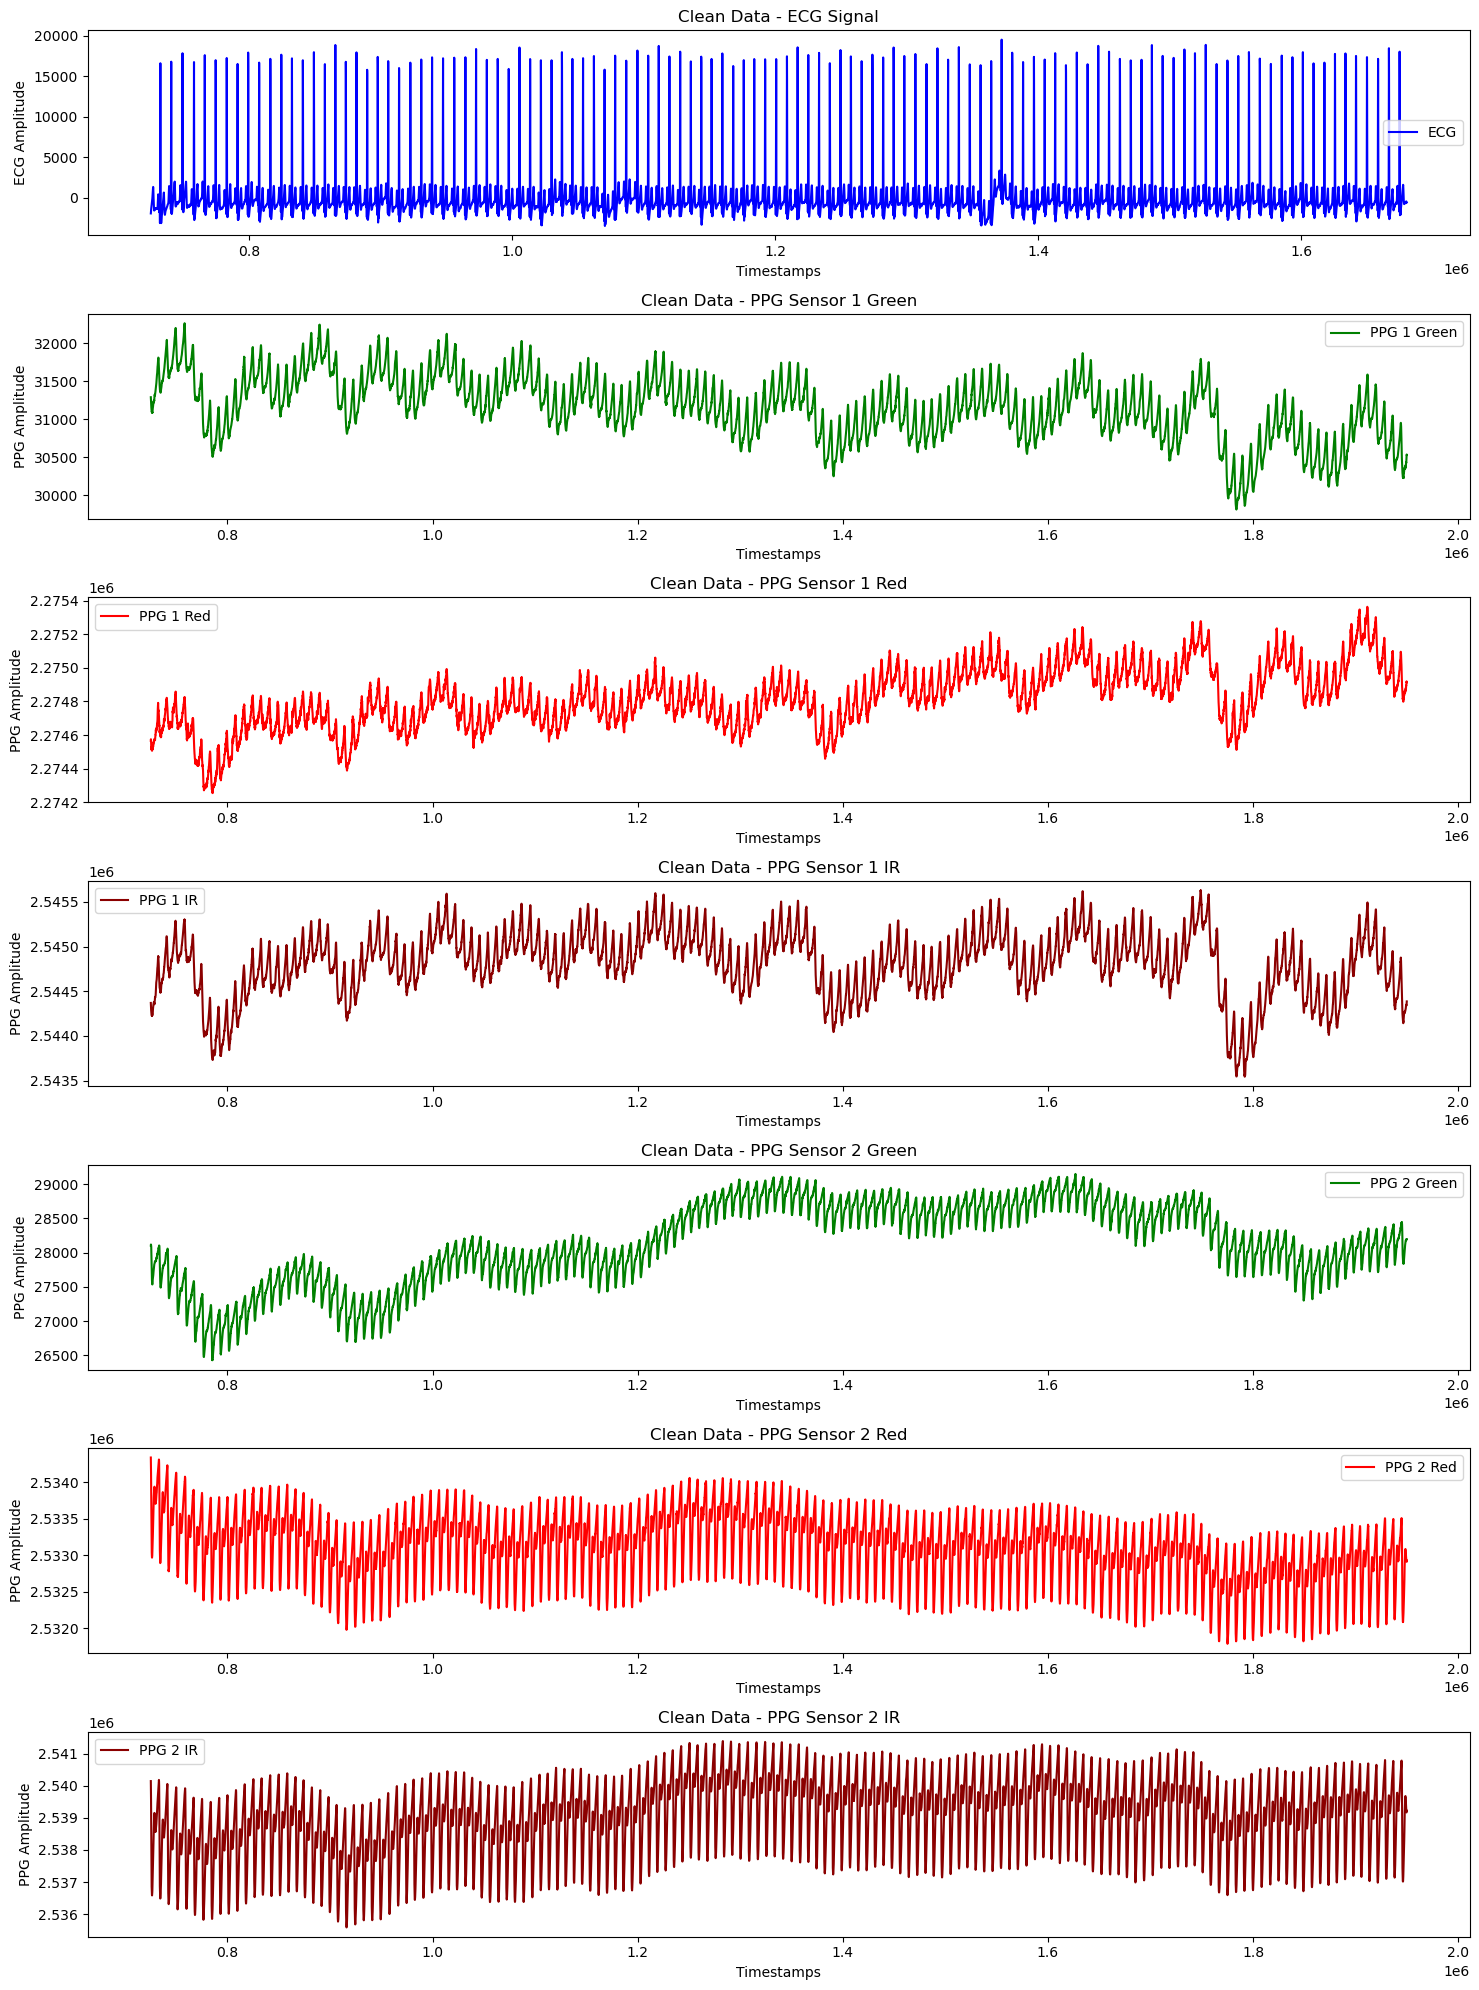

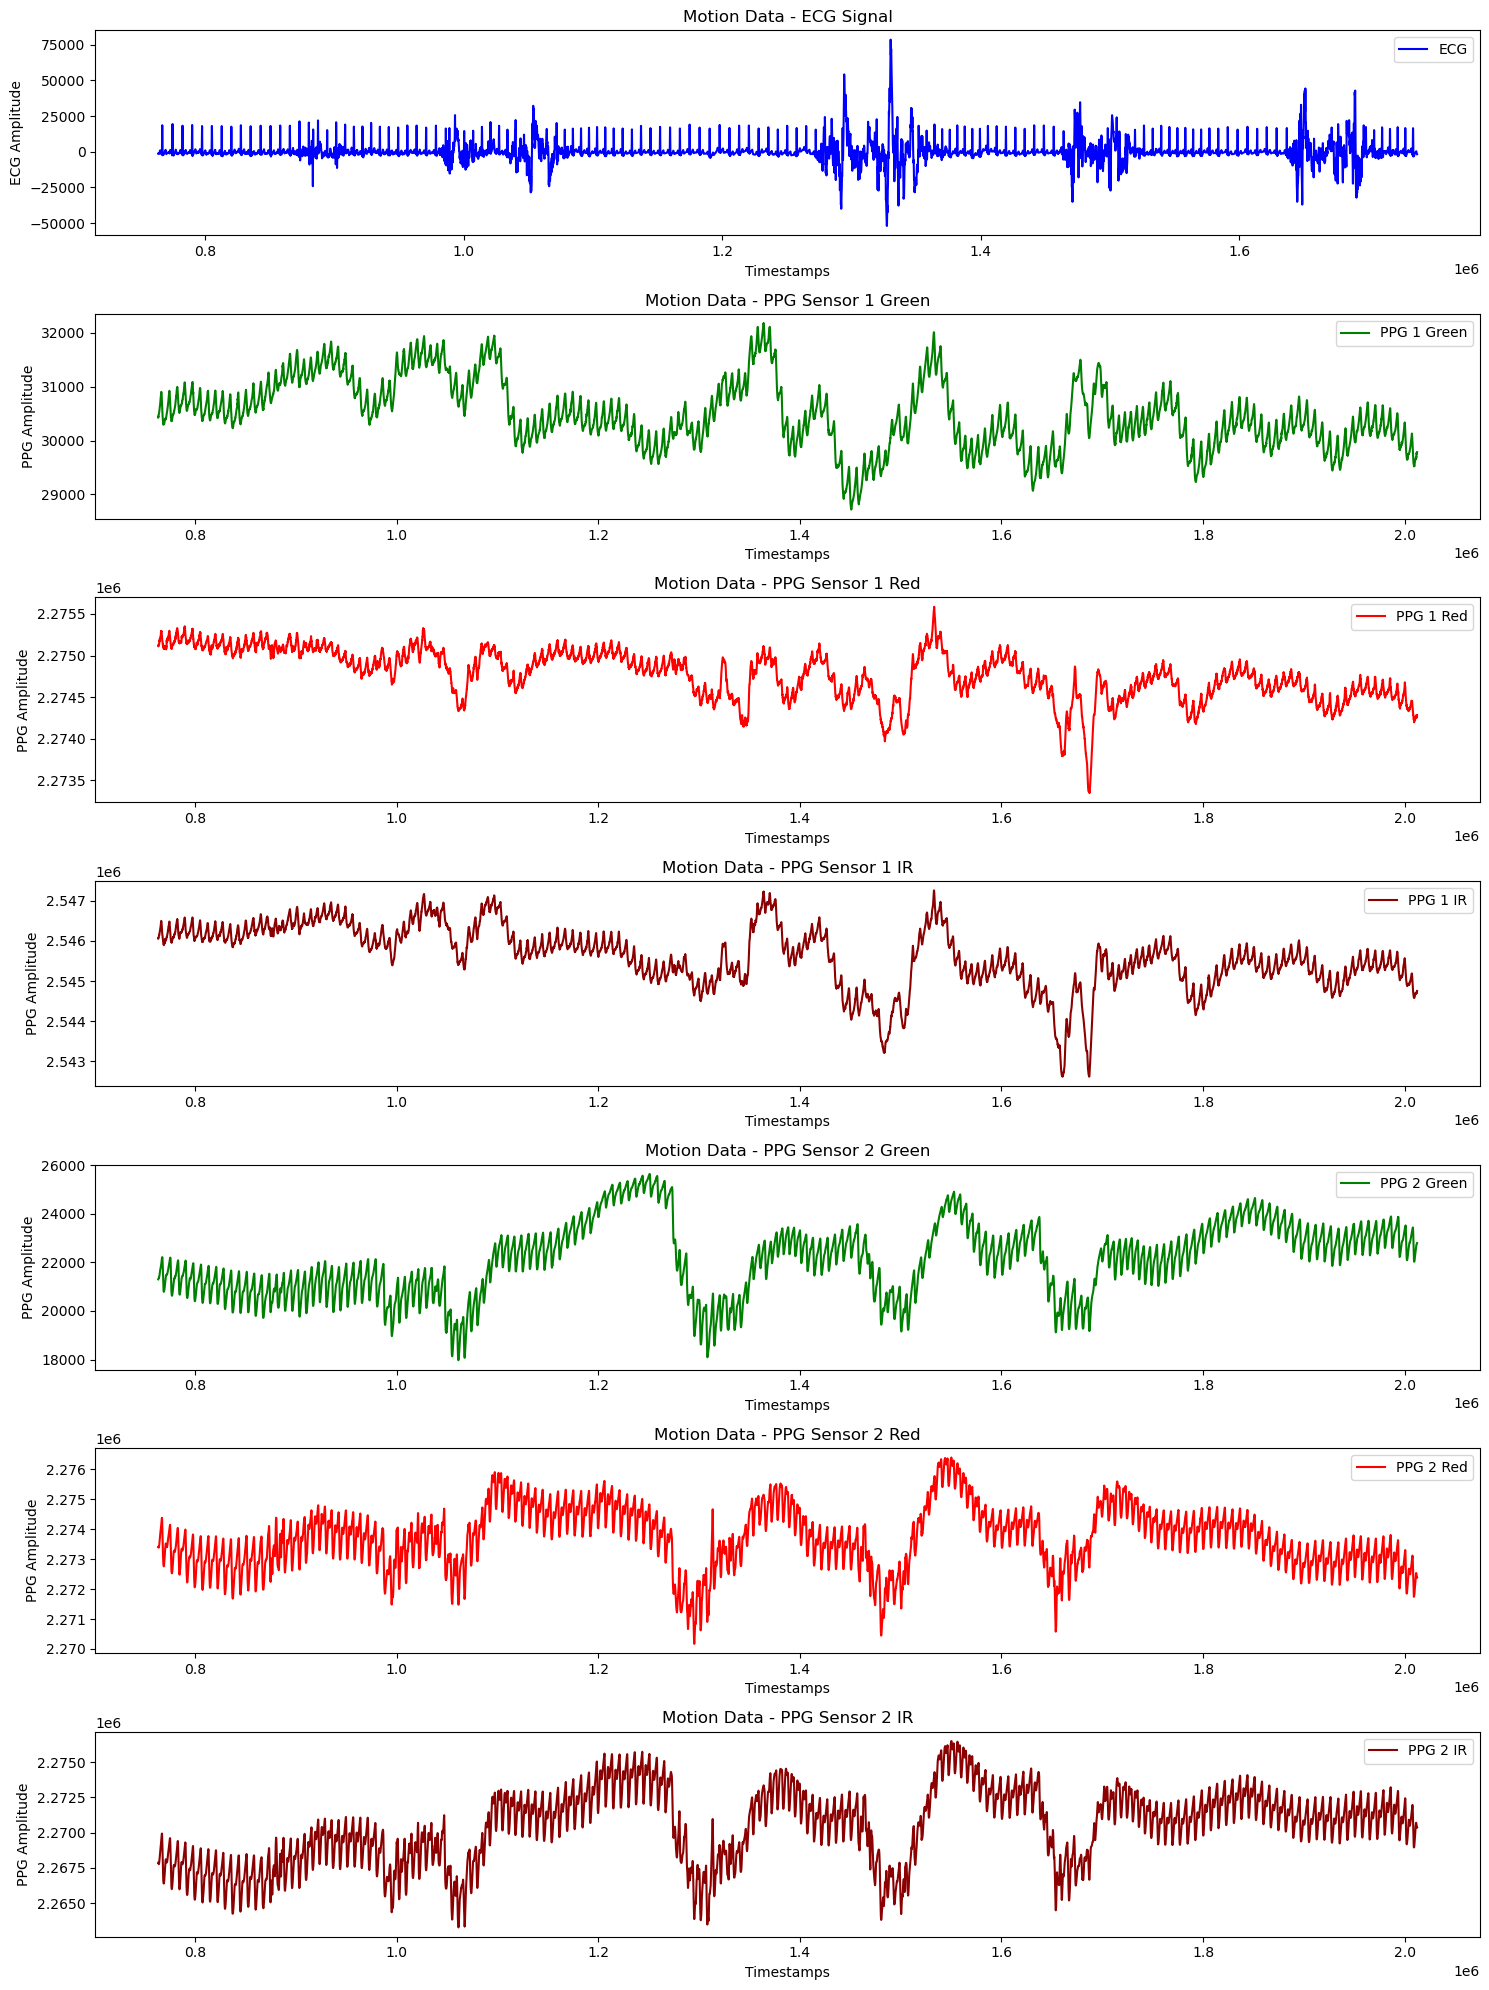

In [76]:
#Ploting the signals

def plot_signals_separate(data, title):
    plt.figure(figsize=(15, 20))
    
    # ECG signal
    plt.subplot(7, 1, 1)
    plt.plot(data['timestamps_ecg'], data['ecg'], label='ECG', color='blue')
    plt.title(f"{title} - ECG Signal")
    plt.xlabel('Timestamps')
    plt.ylabel('ECG Amplitude')
    plt.legend()
    
    # PPG Sensor 1 - Green
    plt.subplot(7, 1, 2)
    plt.plot(data['timestamps_ppg_1_green'], data['ppg_1_green'], label='PPG 1 Green', color='green')
    plt.title(f"{title} - PPG Sensor 1 Green")
    plt.xlabel('Timestamps')
    plt.ylabel('PPG Amplitude')
    plt.legend()

    # PPG Sensor 1 - Red
    plt.subplot(7, 1, 3)
    plt.plot(data['timestamps_ppg_1_red'], data['ppg_1_red'], label='PPG 1 Red', color='red')
    plt.title(f"{title} - PPG Sensor 1 Red")
    plt.xlabel('Timestamps')
    plt.ylabel('PPG Amplitude')
    plt.legend()

    # PPG Sensor 1 - IR
    plt.subplot(7, 1, 4)
    plt.plot(data['timestamps_ppg_1_ir'], data['ppg_1_ir'], label='PPG 1 IR', color='darkred')
    plt.title(f"{title} - PPG Sensor 1 IR")
    plt.xlabel('Timestamps')
    plt.ylabel('PPG Amplitude')
    plt.legend()

    # PPG Sensor 2 - Green
    plt.subplot(7, 1, 5)
    plt.plot(data['timestamps_ppg_2_green'], data['ppg_2_green'], label='PPG 2 Green', color='green')
    plt.title(f"{title} - PPG Sensor 2 Green")
    plt.xlabel('Timestamps')
    plt.ylabel('PPG Amplitude')
    plt.legend()

    # PPG Sensor 2 - Red
    plt.subplot(7, 1, 6)
    plt.plot(data['timestamps_ppg_2_red'], data['ppg_2_red'], label='PPG 2 Red', color='red')
    plt.title(f"{title} - PPG Sensor 2 Red")
    plt.xlabel('Timestamps')
    plt.ylabel('PPG Amplitude')
    plt.legend()

    # PPG Sensor 2 - IR
    plt.subplot(7, 1, 7)
    plt.plot(data['timestamps_ppg_2_ir'], data['ppg_2_ir'], label='PPG 2 IR', color='darkred')
    plt.title(f"{title} - PPG Sensor 2 IR")
    plt.xlabel('Timestamps')
    plt.ylabel('PPG Amplitude')
    plt.legend()
    
    plt.tight_layout()
    plt.show()

# Plot for both datasets with separate wavelength subplots
plot_signals_separate(clean, "Clean Data")
plot_signals_separate(motion, "Motion Data")

The clean datasets seem to have more noise in the ECG and the PPG 2 sensor than in the motion data. On the other hand, in the motion dataset, the signal appears to be more accurate, or it may have been captured more effectively, as the shape is sharper and clearer. Additionally, the different wavelengths from the PPG sensors exhibit quite similar morphology in the signals.

Ex. 2

Resample both signals so that they are the same length and samples are equidistant. Sample frequency should be easily adjusted as a variable. Resample the signals to have 200 Hz as the sampling frequency. The original sampling frequency for ecg is 128 Hz and for ppg it is 100 Hz. Length of the measurements is just over 2 min


I chose from the clean file the ECG and one of the PPg wavelengths (green in sensore 1) to proceed with in the next sections.

In [80]:
data_c = pd.read_csv('ecg_ppg_clean.csv') 

In [82]:
# Pre-cleaning the data and convert to numpy

def cleaning(ecg, ppg):
    time = data_c[ecg].dropna().to_numpy(dtype = 'float')
    amplitude = data_c[ppg].dropna().to_numpy(dtype = 'float')
    return time, amplitude
    
ecg_time, ecg = cleaning('timestamps_ecg', 'ecg')
ppg_time, ppg = cleaning('timestamps_ppg_1_green', 'ppg_1_green')

Normalizing the data ensures that all variables are on the same scale. Also it prevents any single variable from dominating due to differences in scale.
Converting timestamps from microseconds to seconds makes the data easier to interpret and align with standard time scales, simplifying analysis and enhancing readability.

In [85]:
# Normalizing the data and converting timestamps from microseconds to seconds

def normalize(sig):
    sig = sig - np.min(sig)
    sig = sig / np.max(sig)
    return sig

ecg = normalize(ecg)
ppg = normalize(ppg)

ecg_time = (ecg_time - ecg_time[0])/10000 
ppg_time = (ppg_time - ppg_time[0])/10000


I'm not sure what causes the issue in the sampler function, as it sometimes works but sometimes it shows a warning about values being out of the desired range. The warning, a ValueError, occurs because the new time index (x_new) contains values exceeding the maximum value of the original time data (x). By default, the interp1d function does not permit values outside the original dataset's range unless extrapolation is explicitly enabled. You can resolve this by adding fill_value="extrapolate" to the function parameters alongside kind='cubic'.

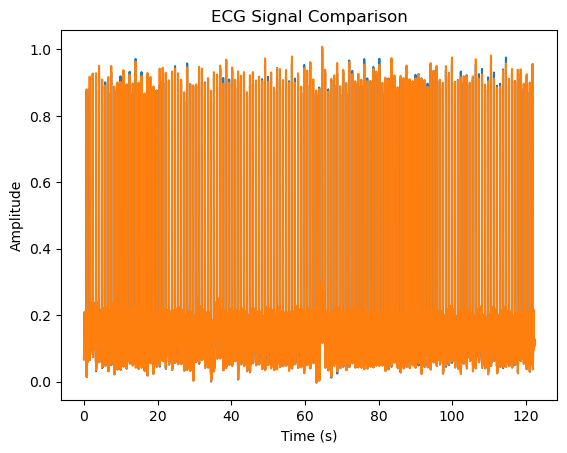

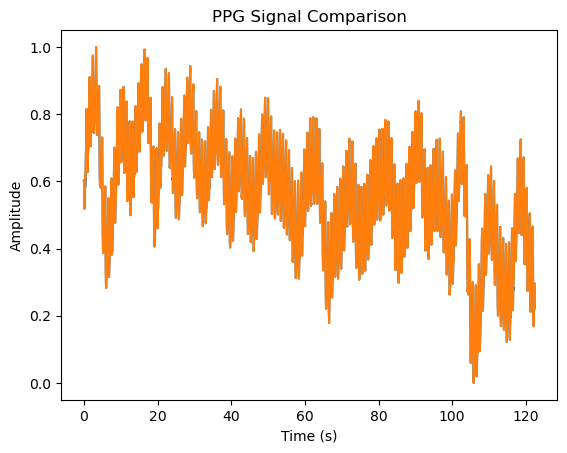

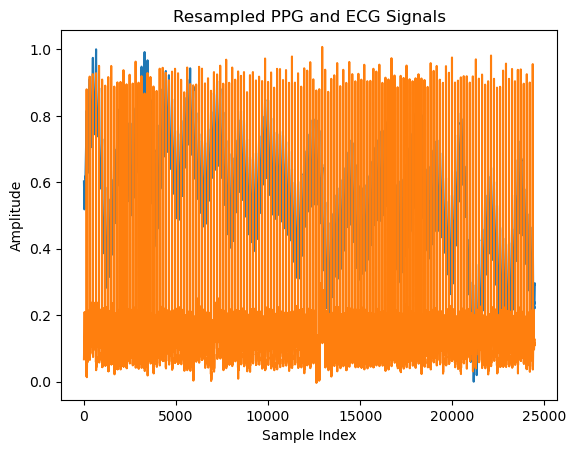

24491
24491


In [90]:
#Resampling
def sampler(time, signal, new_time):
    sig_fn = interpolate.interp1d(time, signal, kind='cubic') #fill_value="extrapolate" inside the ()
    return sig_fn(new_time)  

fs_new = 200
dt = 1/fs_new
T = min(ecg_time[-1], ppg_time[-1])
n = fs_new * T
time_new = np.arange(n+1) * dt

resampled_ecg = sampler(ecg_time, ecg, time_new)
resampled_ppg = sampler(ppg_time, ppg, time_new)

plt.figure()
plt.plot(ecg_time, ecg, label='Original ECG')
plt.plot(time_new, resampled_ecg, label='Resampled ECG')
plt.title('ECG Signal Comparison')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.figure()
plt.plot(ppg_time, ppg, label='Original PPG')
plt.plot(time_new, resampled_ppg, label='Resampled PPG')
plt.title('PPG Signal Comparison')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.figure()
plt.plot(resampled_ppg, label='Resampled PPG')
plt.plot(resampled_ecg, label='Resampled ECG')
plt.title('Resampled PPG and ECG Signals')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')

plt.show()


print(len(resampled_ecg))
print(len(resampled_ppg))

Ex. 3

Visualize the signals in frequency domain. (hint: fft or welch)

Hint: Finding power distribution is simple  by looking at the PSD

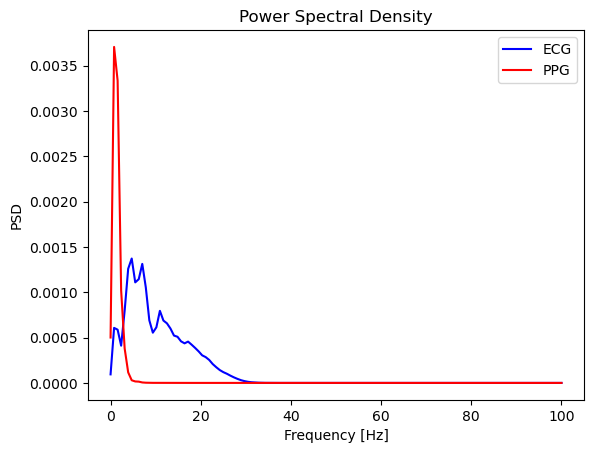

In [94]:
f_ecg, PSD_ecg = signal.welch(resampled_ecg, fs_new)
f_ppg, PSD_ppg = signal.welch(resampled_ppg, fs_new)

plt.figure()
plt.plot(f_ecg, PSD_ecg, 'b', label='ECG')
plt.plot(f_ppg, PSD_ppg, 'r', label='PPG')
plt.xlabel('Frequency [Hz]')
plt.ylabel('PSD')
plt.title('Power Spectral Density')
plt.legend()

ex. 3.2

Do they look as expected (compare to frequencies that you expected to see in these modalities)? Which frequency band carries most of the information?

- You can see that most of the signal energy for both ECG (blue) and PPG (red) is concentrated below about 10–20 Hz. Most signal energy is below 10–20 Hz. This aligns with heart rate (~1 Hz or 60 bpm).
- ECG has broader frequencies (up to ~20–35 Hz) due to the sharp QRS complex. PPG is smoother, with most energy around 1–2 Hz and a rapid drop-off at higher frequencies.
- Most of the information for both signals is carried in the 0–20 Hz frequency band. This is typical for ECG and PPG signals since they primarily represent low-frequency physiological processes such as heart rate and respiratory influences.

Ex. 4

Filter the signal using butterworth and moving average filters using reasonable frequency band/smoothing so that you are not filtering out the information carrying signal i.e. filter out only out-of-band noise.

Typically, ECG signals carry meaningful information up to about 40 Hz (including the sharp QRS complexes), while anything below 0.5 Hz is usually baseline drift and above 40 Hz is mostly noise. In contrast, PPG signals are smoother and have most of their energy in a lower frequency band, which is why I chose a narrower frequency range for the PPG filter.

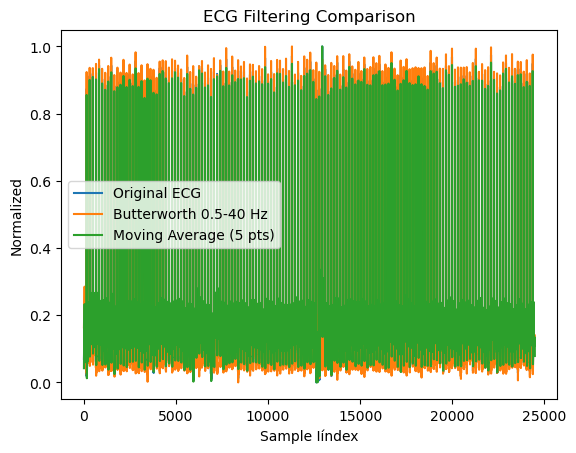

In [100]:
low_cutoff = 0.5 
high_cutoff = 40            
Nyquist_freq = fs_new / 2

low = low_cutoff / Nyquist_freq
high = high_cutoff / Nyquist_freq

order_4 = 4
b_4, a_4 = sp.signal.butter(order_4, [low, high], btype='band')

filtered_ecg = sp.signal.filtfilt(b_4, a_4, resampled_ecg)


window = 5
mov_ecg = np.convolve(resampled_ecg, np.ones(window)/window, mode='same')


plt.figure()
plt.plot(normalize(resampled_ecg), label='Original ECG')
plt.plot(normalize(filtered_ecg), label='Butterworth 0.5-40 Hz')
plt.plot(normalize(mov_ecg), label=f'Moving Average ({window} pts)')
plt.title('ECG Filtering Comparison')
plt.xlabel('Sample Iíndex')
plt.ylabel('Normalized')
plt.legend()
plt.show()

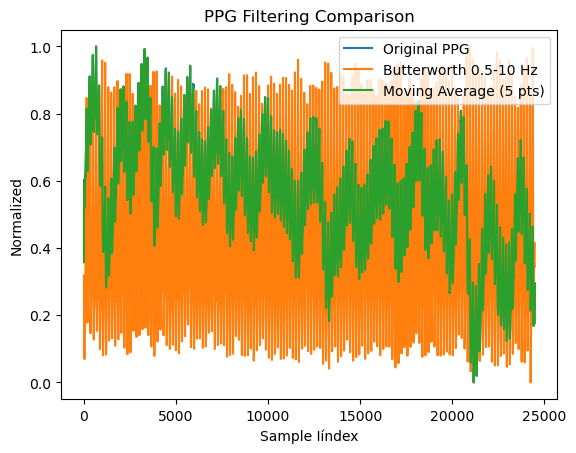

In [102]:
low_cutoff_p = 0.5 
high_cutoff_p = 10           

low = low_cutoff_p / Nyquist_freq
high = high_cutoff_p / Nyquist_freq

order_4_p = 4
b_4, a_4 = sp.signal.butter(order_4_p, [low, high], btype='band')

filtered_ppg = sp.signal.filtfilt(b_4, a_4, resampled_ppg)


mov_ppg = np.convolve(resampled_ppg, np.ones(window)/window, mode='same')


plt.figure()
plt.plot(normalize(resampled_ppg), label='Original PPG')
plt.plot(normalize(filtered_ppg), label='Butterworth 0.5-10 Hz')
plt.plot(normalize(mov_ppg), label=f'Moving Average ({window} pts)')
plt.title('PPG Filtering Comparison')
plt.xlabel('Sample Iíndex')
plt.ylabel('Normalized')
plt.legend()
plt.show()